#### <span style="color:blue">Installing The Packages and library</span>

In [2]:
# Installing the packages
library(tidyverse)
# install.packages("qdap")
# install.packages("magrittr")
# install.packages("purrr")
# install.packages("glue")
# install.packages("stringr")
library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings
library(stringr) # to hand strings
#install.packages("rvest")
#remotes::install_github("dmi3kno/polite")("politer")
library(rvest) # rvest makes scraping easier
library(polite) # polite is the "polite" version of rvest
library(qdap)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract



Attaching package: 'glue'


The following object is masked from 'package:dplyr':

    collapse


Loading required package: xml2


Attaching package: 'rvest'


The following object is masked from 'package:purrr':

    pluck


The following object is masked from 'package:readr':

    guess_encoding


Loading required package: qdapDictionaries

Loading required package: qdapRegex


Attaching package: 'qdapRegex'


The following object is mas

#### <span style="color:blue">Taking base url</span>

In [6]:
url_titles <- "https://www.goodreads.com/giveaway/genre/mystery" # this is the base url from where the scraping starts

page_title <- read_html(url_titles)

#### <span style="color:blue">Trying to glimpse the html list</span>

In [8]:
page_title %>% typeof()
page_title %>% glimpse()

[1] "list"

List of 2
 $ node:<externalptr> 
 $ doc :<externalptr> 
 - attr(*, "class")= chr [1:2] "xml_document" "xml_node"


#### <span style="color:blue">Taking base url trying to view how the tags look like</span>

In [9]:
page_title

{xml_document}
<html class="desktop withSiteHeaderTopFullImage
">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body class="">\n<div data-react-class="ReactComponents.StoresInitializer ...

#### <span style="color:blue">Getting HTML Structure</span>

In [10]:
page_title %>% html_structure()

<html.desktop.withSiteHeaderTopFullImage
>
  <head>
    <meta [http-equiv, content]>
    <title>
      {text}
    <meta [content, name]>
    <meta [content, name]>
    <script [type]>
      {cdata}
    <script [src]>
    <script>
      {cdata}
    <link [rel, media, href]>
    <link [rel, media, href]>
    <script [src]>
    <script [src]>
    <script>
      {cdata}
    <script>
      {cdata}
    <script>
      {cdata}
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <script [src, defer]>
    <script [src, defer]>
    <script [src, defer]>
    <link [rel, type, href, title]>
    <script>
      {cdata}
    <meta [name, content]>
    <meta [content, name]>
    <meta [content, name]>
    <meta [content, name]>
    <meta [content, name]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
  <body.>
    {text}
    <div [data-react-class, data-react-props]>
      <noscript [data-reactid, data-react-checksum]>
    {text}
    <di

#### <span style="color:blue">Scrapping Book Title from the URL</span>

In [11]:
page_title %>%
  html_nodes(".bookTitle") # write .title, with the dot, because we want all results with that tag. Try removing it and see what happens.

{xml_nodeset (30)}
 [1] <a class="bookTitle" href="https://www.goodreads.com/book/show/48270415- ...
 [2] <a class="bookTitle" href="https://www.goodreads.com/book/show/40511233- ...
 [3] <a class="bookTitle" href="https://www.goodreads.com/book/show/44088167- ...
 [4] <a class="bookTitle" href="https://www.goodreads.com/book/show/43875794- ...
 [5] <a class="bookTitle" href="https://www.goodreads.com/book/show/43397831- ...
 [6] <a class="bookTitle" href="https://www.goodreads.com/book/show/44424442- ...
 [7] <a class="bookTitle" href="https://www.goodreads.com/book/show/43447788- ...
 [8] <a class="bookTitle" href="https://www.goodreads.com/book/show/44003533- ...
 [9] <a class="bookTitle" href="https://www.goodreads.com/book/show/41860837- ...
[10] <a class="bookTitle" href="https://www.goodreads.com/book/show/45035086- ...
[11] <a class="bookTitle" href="https://www.goodreads.com/book/show/41576198- ...
[12] <a class="bookTitle" href="https://www.goodreads.com/book/show/45440577- .

In [13]:
title <- page_title %>%
  html_nodes(".bookTitle") %>%
  html_text()

#### <span style="color:blue">Scrapping AuthorName</span>

In [14]:
authorName <- page_title %>%
  html_nodes(".authorName") %>%
  html_text()

#### <span style="color:blue">Storing the title in a dataframe</span>

In [21]:
SLS_df <- data_frame(Genre = "Mystery",
                     Title = title,
                    ) # build the Title variable using the code we used above

SLS_df

Warning message:
"`data_frame()` is deprecated, use `tibble()`.
This warning is displayed once per session."


Genre,Title
<chr>,<chr>
Mystery,Big Bad: A Novel
Mystery,Little Voices
Mystery,The Raid (Ryan Decker #2)
Mystery,"Dark Pattern (The Naturalist, #4)"
Mystery,Black Rock Bay
Mystery,I Will Make You Pay
Mystery,The Eighth Master
Mystery,The Poison Garden
Mystery,The Patient


#### <span style="color:blue">Taking list of links for each book Title</span>

In [22]:
page_title %>%
  html_nodes(".bookTitle") %>%
  html_attrs() %>%
  map_chr("href")

[1] "https://www.goodreads.com/book/show/48270415-big-bad"                     
 [2] "https://www.goodreads.com/book/show/40511233-little-voices"               
 [3] "https://www.goodreads.com/book/show/44088167-the-raid"                    
 [4] "https://www.goodreads.com/book/show/43875794-dark-pattern"                
 [5] "https://www.goodreads.com/book/show/43397831-black-rock-bay"              
 [6] "https://www.goodreads.com/book/show/44424442-i-will-make-you-pay"         
 [7] "https://www.goodreads.com/book/show/43447788-the-eighth-master"           
 [8] "https://www.goodreads.com/book/show/44003533-the-poison-garden"           
 [9] "https://www.goodreads.com/book/show/41860837-the-patient"                 
[10] "https://www.goodreads.com/book/show/45035086-lost-tomorrows"              
[11] "https://www.goodreads.com/book/show/41576198-drowning-with-others"        
[12] "https://www.goodreads.com/book/show/45440577-bad-memory"                  
[13] "https://www.goodreads.com/book/show/43521128-a-bitter-feast"              
[14] "https://www.goodreads.com/book/show/45550840-in-the-shadow-of-power"      
[15] "https://www.goodreads.com/book/show/43263431-beating-about-the-bush"      
[16] "https://www.goodreads.com/book/show/43309522-a-cruel-deception"           
[17] "https://www.goodreads.com/book/show/25191538-mrs-roosevelt-s-confidante"  
[18] "https://www.goodreads.com/book/show/9797819-favorite"                     
[19] "https://www.goodreads.com/book/show/47138043-a-small-town"                
[20] "https://www.goodreads.com/book/show/44181419-robert-b-parker-s-angel-eyes"
[21] "https://www.goodreads.com/book/show/44025144-the-candy-cane-caper"        
[22] "https://www.goodreads.com/book/show/13093701-a-fountain-filled-with-blood"
[23] "https://www.goodreads.com/book/show/45043976-mac-on-a-hot-tin-roof"       
[24] "https://www.goodreads.com/book/show/44768785-murder-she-wrote"            
[25] "https://www.goodreads.com/book/show/47812578-dreamland"                   
[26] "https://www.goodreads.com/book/show/43865459-nogged-off"                  
[27] "https://www.goodreads.com/book/show/30653963-the-day-i-died"              
[28] "https://www.goodreads.com/book/show/43615810-the-playground"              
[29] "https://www.goodreads.com/book/show/46158735-thistles-and-thieves"        
[30] "https://www.goodreads.com/book/show/47364243-the-good-killer"

#### <span style="color:blue">Storing links in the Dataframe</span>

In [23]:
SLS_df %<>% # the %<>% is from magrittr, it corresponds to SLS_df <- SLS_df %>% ...
  mutate(Link = page_title %>%
  html_nodes(".bookTitle") %>%
  html_attr("href")) 


SLS_df

Genre,Title,Link
<chr>,<chr>,<chr>
Mystery,Big Bad: A Novel,https://www.goodreads.com/book/show/48270415-big-bad
Mystery,Little Voices,https://www.goodreads.com/book/show/40511233-little-voices
Mystery,The Raid (Ryan Decker #2),https://www.goodreads.com/book/show/44088167-the-raid
Mystery,"Dark Pattern (The Naturalist, #4)",https://www.goodreads.com/book/show/43875794-dark-pattern
Mystery,Black Rock Bay,https://www.goodreads.com/book/show/43397831-black-rock-bay
Mystery,I Will Make You Pay,https://www.goodreads.com/book/show/44424442-i-will-make-you-pay
Mystery,The Eighth Master,https://www.goodreads.com/book/show/43447788-the-eighth-master
Mystery,The Poison Garden,https://www.goodreads.com/book/show/44003533-the-poison-garden
Mystery,The Patient,https://www.goodreads.com/book/show/41860837-the-patient


#### <span style="color:blue">Scrapping authorname</span>

In [24]:
page_title  %>%
  html_nodes(".authorName") %>%
  html_text()

[1] "Christian Galacar"     "Vanessa Lillie"        "Steven Konkoly"       
 [4] "Andrew Mayne"          "Brianna Labuskes"      "Teresa Driscoll"      
 [7] "J.D. Rutherford"       "A.J. Banner"           "Steena Holmes"        
[10] "Matt Coyle"            "Linda Keir"            "Lisa      Gray"       
[13] "Deborah Crombie"       "Viveca Sten"           "Marlaine Delargy"     
[16] "(Translator)"          "M.C. Beaton"           "Charles Todd"         
[19] "Susan Elia MacNeal"    "Karen McQuestion"      "Thomas Perry"         
[22] "Ace Atkins"            "Robert B. Parker"      "Josi S. Kilpack"      
[25] "Julia Spencer-Fleming" "Melinda Metz"          "Jessica Fletcher"     
[28] "Jon Land"              "Nancy Bilyeau"         "Barbara  Ross"        
[31] "Lori Rader-Day"        "Jane Shemilt"          "Molly MacRae"         
[34] "Harry Dolan"

#### <span style="color:blue">Defining function for authorName</span>

In [25]:
get_author <- function(link){
  
  author_chunks <- glue("{link}") %>%
   read_html() %>%
   html_nodes(".authorName") 
  
  # we do a sanity check to see that there's something inside the lyrics!
  stopifnot(length(author_chunks) > 0)
  
  author <- author_chunks %>%
   html_text()  
    
   author <- author[1]
    
   author <- author %>%
   glue_collapse(sep =  "\n")
    
  return(author)
}

#### <span style="color:blue">Storing Authorname in the Dataframe using mutate function</span>

In [26]:
SLS_df_top <- SLS_df %>%
  mutate(AuthorName = map_chr(Link, get_author))
SLS_df_top

Genre,Title,Link,AuthorName
<chr>,<chr>,<chr>,<chr>
Mystery,Big Bad: A Novel,https://www.goodreads.com/book/show/48270415-big-bad,Christian Galacar
Mystery,Little Voices,https://www.goodreads.com/book/show/40511233-little-voices,Vanessa Lillie
Mystery,The Raid (Ryan Decker #2),https://www.goodreads.com/book/show/44088167-the-raid,Steven Konkoly
Mystery,"Dark Pattern (The Naturalist, #4)",https://www.goodreads.com/book/show/43875794-dark-pattern,Andrew Mayne
Mystery,Black Rock Bay,https://www.goodreads.com/book/show/43397831-black-rock-bay,Brianna Labuskes
Mystery,I Will Make You Pay,https://www.goodreads.com/book/show/44424442-i-will-make-you-pay,Teresa Driscoll
Mystery,The Eighth Master,https://www.goodreads.com/book/show/43447788-the-eighth-master,J.D. Rutherford
Mystery,The Poison Garden,https://www.goodreads.com/book/show/44003533-the-poison-garden,A.J. Banner
Mystery,The Patient,https://www.goodreads.com/book/show/41860837-the-patient,Steena Holmes


#### <span style="color:blue">Scrapping rating of the book</span>

In [27]:
url_title <- "https://www.goodreads.com/book/show/43523057-expeditions-unpacked"

url_title  %>%
read_html() %>%
  html_nodes("[itemprop=ratingValue]") %>%
  html_text()

[1] "\n  4.60\n"

#### <span style="color:blue">Defining Function for scrapping rating of the book</span>

In [28]:
get_rating <- function(link){
  
  author_chunks <- glue("{link}") %>%
   read_html() %>%
   html_nodes("[itemprop=ratingValue]") 
  
  # we do a sanity check to see that there's something inside the lyrics!
  stopifnot(length(author_chunks) > 0)
  
  author <- author_chunks %>%
   html_text() %>%
   glue_collapse(sep =  "\n")
  
  return(author)
}

#### <span style="color:blue">Storing Ratings into the dataframe</span>

In [29]:
SLS_df_top1 <- SLS_df_top %>%
  mutate(Rating = map_chr(Link, get_rating))
SLS_df_top1

Genre,Title,Link,AuthorName,Rating
<chr>,<chr>,<chr>,<chr>,<chr>
Mystery,Big Bad: A Novel,https://www.goodreads.com/book/show/48270415-big-bad,Christian Galacar,4.78
Mystery,Little Voices,https://www.goodreads.com/book/show/40511233-little-voices,Vanessa Lillie,3.70
Mystery,The Raid (Ryan Decker #2),https://www.goodreads.com/book/show/44088167-the-raid,Steven Konkoly,4.38
Mystery,"Dark Pattern (The Naturalist, #4)",https://www.goodreads.com/book/show/43875794-dark-pattern,Andrew Mayne,3.96
Mystery,Black Rock Bay,https://www.goodreads.com/book/show/43397831-black-rock-bay,Brianna Labuskes,4.00
Mystery,I Will Make You Pay,https://www.goodreads.com/book/show/44424442-i-will-make-you-pay,Teresa Driscoll,4.12
Mystery,The Eighth Master,https://www.goodreads.com/book/show/43447788-the-eighth-master,J.D. Rutherford,4.14
Mystery,The Poison Garden,https://www.goodreads.com/book/show/44003533-the-poison-garden,A.J. Banner,4.00
Mystery,The Patient,https://www.goodreads.com/book/show/41860837-the-patient,Steena Holmes,4.05


#### <span style="color:blue">Scraping the description and defining function for it and storing it in a dataframe</span>

In [33]:
get_description <- function(link){
  
  description_chunks <- glue("{link}") %>%
   read_html() %>%
   html_nodes("#description") 
  
  # we do a sanity check to see that there's something inside the lyrics!
  stopifnot(length(description_chunks) > 0)
  
  description <- description_chunks %>%
   html_text() %>%
   glue_collapse(sep =  "\n")
  
  return(description)
}

#### <span style="color:blue">Getting the description safely. This is required as some rows will not have descriptions available</span>

In [34]:
get_description_safe <- purrr::possibly(.f = get_description, # the function that we want to make safer
                                   otherwise = NA_character_) # the value we get back if .f fails

In [36]:
SLS_df_top2 <- SLS_df_top1 %>%
  mutate(Description = map_chr(Link, get_description_safe))
SLS_df_top2

Genre,Title,Link,AuthorName,Rating,Description
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Mystery,Big Bad: A Novel,https://www.goodreads.com/book/show/48270415-big-bad,Christian Galacar,4.78,"From the twisted imagination of bestselling author Christian Galacar comes a dark mystery thriller about the difference between living the stories we’re given and living the stories we dare to make for ourselves. At the height of a blizzard, Molly Rifkin goes missing in her small New England community of Rockcliffe Island. But when she is found dead of an apparent suicide From the twisted imagination of bestselling author Christian Galacar comes a dark mystery thriller about the difference between living the stories we’re given and living the stories we dare to make for ourselves. At the height of a blizzard, Molly Rifkin goes missing in her small New England community of Rockcliffe Island. But when she is found dead of an apparent suicide, the story doesn’t add up. There are more questions than answers. And there are people who would like to see the whole thing just go away. But it won’t be that easy...Molly’s sister is FBI agent Emma Shane, who has been hanging on to her career by a thread, and when her sister turns up dead under suspicious circumstances, she is forced to confront the horrific past they once shared in order to discover the truth of her death—and the course of her own future.As Emma digs deeper into the mystery on Rockcliffe Island, she finds herself coming face-to-face with corruption, murder, and two of Rockcliffe’s most powerful and dangerous families. ...more"
Mystery,Little Voices,https://www.goodreads.com/book/show/40511233-little-voices,Vanessa Lillie,3.70,"The voice in her head says he’s guilty. She knows he’s innocent.Devon Burges is in the throes of a high-risk birth when she learns of her dear friend’s murder. The police quickly name another friend as the chief suspect, but Devon doesn’t buy it—and despite her difficult recovery, she decides to investigate.Haunted by postpartum problems that manifest as a cruel voice in h The voice in her head says he’s guilty. She knows he’s innocent.Devon Burges is in the throes of a high-risk birth when she learns of her dear friend’s murder. The police quickly name another friend as the chief suspect, but Devon doesn’t buy it—and despite her difficult recovery, she decides to investigate.Haunted by postpartum problems that manifest as a cruel voice in her head, Devon is barely getting by. Yet her instincts are still sharp, and she’s bent on proving her friend’s innocence.But as Devon digs into the evidence, the voice in her head grows more insistent, the danger more intense. Each layer is darker, more disturbing, and she’s not sure she—or her baby—can survive what lies at the truth. ...more"
Mystery,The Raid (Ryan Decker #2),https://www.goodreads.com/book/show/44088167-the-raid,Steven Konkoly,4.38,"A Border Patrol murder exposes a high-level conspiracy in USA Today bestselling author Steven Konkoly’s explosive thriller.After exposing and dismantling a deep-state conspiracy that nearly destroyed his life, Ryan Decker finds his covert skills have put him on the radar of influential Senator Steele. Now Steele needs his help. Two patrol agents were killed in a bizarre ex A Border Patrol murder exposes a high-level conspiracy in USA Today bestselling author Steven Konkoly’s explosive thriller.After exposing and dismantling a deep-state conspiracy that nearly destroyed his life, Ryan Decker finds his covert skills have put him on the radar of influential Senator Steele. Now Steele needs his help. Two patrol agents were killed in a bizarre explosion near the US-Mexico border—and the evidence doesn’t line up with the official story.Enlisted by Steele to run an undercover, off-the-books investigation, Decker and his partner, Harlow, head to the border town of Tecate. But when they’re caught in an ambush, Decker realizes they’ve stumbled onto something far more dangerous than any of them u

#### <span style="color:blue">Function for Scrapping the releaseDate</span>

In [37]:
get_releaseDate <- function(link){
 
  release_chunks <- glue("{link}") %>%
   read_html() %>%
   html_nodes(".releaseDate")
 
  # we do a sanity check to see that there's something inside the lyrics!
  stopifnot(length(release_chunks) > 0)
 
  releaseDate <- release_chunks %>%
   html_text()  
   
   #author <- author[1]
   
   #author <- author %>%
   #glue_collapse(sep =  "\n")
   
  return(releaseDate)
}

In [40]:
SLS_df_top2 <- SLS_df_top2 %>%
  mutate(ReleaseDate = map_chr(Link, get_releaseDate))
SLS_df_top2

Genre,Title,Link,AuthorName,Rating,Description,ReleaseDate
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Mystery,Big Bad: A Novel,https://www.goodreads.com/book/show/48270415-big-bad,Christian Galacar,4.78,"From the twisted imagination of bestselling author Christian Galacar comes a dark mystery thriller about the difference between living the stories we’re given and living the stories we dare to make for ourselves. At the height of a blizzard, Molly Rifkin goes missing in her small New England community of Rockcliffe Island. But when she is found dead of an apparent suicide From the twisted imagination of bestselling author Christian Galacar comes a dark mystery thriller about the difference between living the stories we’re given and living the stories we dare to make for ourselves. At the height of a blizzard, Molly Rifkin goes missing in her small New England community of Rockcliffe Island. But when she is found dead of an apparent suicide, the story doesn’t add up. There are more questions than answers. And there are people who would like to see the whole thing just go away. But it won’t be that easy...Molly’s sister is FBI agent Emma Shane, who has been hanging on to her career by a thread, and when her sister turns up dead under suspicious circumstances, she is forced to confront the horrific past they once shared in order to discover the truth of her death—and the course of her own future.As Emma digs deeper into the mystery on Rockcliffe Island, she finds herself coming face-to-face with corruption, murder, and two of Rockcliffe’s most powerful and dangerous families. ...more","Release date: Sep 25, 2019"
Mystery,Little Voices,https://www.goodreads.com/book/show/40511233-little-voices,Vanessa Lillie,3.70,"The voice in her head says he’s guilty. She knows he’s innocent.Devon Burges is in the throes of a high-risk birth when she learns of her dear friend’s murder. The police quickly name another friend as the chief suspect, but Devon doesn’t buy it—and despite her difficult recovery, she decides to investigate.Haunted by postpartum problems that manifest as a cruel voice in h The voice in her head says he’s guilty. She knows he’s innocent.Devon Burges is in the throes of a high-risk birth when she learns of her dear friend’s murder. The police quickly name another friend as the chief suspect, but Devon doesn’t buy it—and despite her difficult recovery, she decides to investigate.Haunted by postpartum problems that manifest as a cruel voice in her head, Devon is barely getting by. Yet her instincts are still sharp, and she’s bent on proving her friend’s innocence.But as Devon digs into the evidence, the voice in her head grows more insistent, the danger more intense. Each layer is darker, more disturbing, and she’s not sure she—or her baby—can survive what lies at the truth. ...more","Release date: Oct 01, 2019"
Mystery,The Raid,https://www.goodreads.com/book/show/44088167-the-raid,Steven Konkoly,4.38,"A Border Patrol murder exposes a high-level conspiracy in USA Today bestselling author Steven Konkoly’s explosive thriller.After exposing and dismantling a deep-state conspiracy that nearly destroyed his life, Ryan Decker finds his covert skills have put him on the radar of influential Senator Steele. Now Steele needs his help. Two patrol agents were killed in a bizarre ex A Border Patrol murder exposes a high-level conspiracy in USA Today bestselling author Steven Konkoly’s explosive thriller.After exposing and dismantling a deep-state conspiracy that nearly destroyed his life, Ryan Decker finds his covert skills have put him on the radar of influential Senator Steele. Now Steele needs his help. Two patrol agents were killed in a bizarre explosion near the US-Mexico border—and the evidence doesn’t line up with the official story.Enlisted by Steele to run an undercover, off-the-books investigation, Decker and his partner, Harlow, head to the border town of Tecate. But when they’re caught in an ambush, Decker realizes they’ve st

#### <span style="color:blue">Trying to remove brackets for a single text so that can do it for the whole column.</span>

#### <span style="color:blue">Wrangling The Scraped Data: </span>
#### 1) We have removed the brackets present in the Title column  
#### 2) Changed the releaseDate from String to Date format 
#### 3) Extracted only the years from ReleaseDate column for the plotting purpose later on. 
#### 4) We have removed the fixed text coming in the ReleaseDate column as "Release Date:" for which we have used the function sub()

In [43]:
#install.packages("qdap")
#library(qdap)
library(lubridate)


Attaching package: 'lubridate'


The following object is masked from 'package:base':

    date




#### <span style="color:blue">The below function does the work of removing brackets. We removed bracket content as it was decription of the book in short which is not required as we already have description column for that</span>

In [56]:

bracketX(sls) -> sls
sls

[1] "megha"

#### <span style="color:blue">Doing the same for the whole column that is Title</span>

In [38]:
bracketX(SLS_df_top2$Title) -> SLS_df_top2$Title

#### <span style="color:blue">Changing ReleaseDate into Date format and removing "Release date:" text from the column</span>

In [44]:
sub('Release\n          date:', '', SLS_df_top2$ReleaseDate) -> SLS_df_top2$ReleaseDate
mdy(SLS_df_top2$ReleaseDate) -> SLS_df_top2$ReleaseDate

#### <span style="color:blue">Automating The whole process so that we can work on different genre</span>

In [46]:
# your answer here# your answer here
get_words <- function(genre){

  # remove white space from band name and substitute them with a dash
  collapsed_name <- str_replace_all(genre, " ", "-") # this line uses a function from stringr
  # define url to get the title and links
  url <- glue("https://www.goodreads.com/giveaway/genre/{genre}")
  url <- read_html(url)
  # read title page and extract the title chunks 

  list_of_titles <- url %>% html_nodes(".bookTitle")
    # Extracting book titles 
  
  # and we build the dataframe
  BookDetails <- data_frame(Genre = genre,
                       # extract text title
                      Titles = list_of_titles %>%   html_text(), # we want only the text of the title, not all the html overhead,
                       # extract book link
                       Link =  list_of_titles %>% html_attr("href"), # and we need the link to the page
                       # map to get author Name
                       AuthorName = map_chr(Link, get_author), # here is where we do the main job, using get_lyrics_safe()
                       Rating = map_chr(Link, get_rating),
                        ReleaseDate = map_chr(Link, get_releaseDate), # Scrapping the releaseDate
                       Description = map_chr(Link, get_description_safe)
                      ) 
    ## Performing the wrangling on the data that is ReleaseDate and converting Date from String to Date Type and removing the brackets from Title
    bracketX(BookDetails$Titles) -> BookDetails$Titles
    sub('Release\n          date:', '', BookDetails$ReleaseDate) -> BookDetails$ReleaseDate
    mdy(BookDetails$ReleaseDate) -> BookDetails$ReleaseDate
  return(BookDetails)
}

#### <span style="color:blue">Extracting The Dataframe for different Genre and saving it in a dataframe</span>

In [47]:
mysterydf <- "Mystery" %>% get_words()
mysterydf

Genre,Titles,Link,AuthorName,Rating,ReleaseDate,Description
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
Mystery,Big Bad: A Novel,https://www.goodreads.com/book/show/48270415-big-bad,Christian Galacar,4.78,2019-09-25,"From the twisted imagination of bestselling author Christian Galacar comes a dark mystery thriller about the difference between living the stories we’re given and living the stories we dare to make for ourselves. At the height of a blizzard, Molly Rifkin goes missing in her small New England community of Rockcliffe Island. But when she is found dead of an apparent suicide From the twisted imagination of bestselling author Christian Galacar comes a dark mystery thriller about the difference between living the stories we’re given and living the stories we dare to make for ourselves. At the height of a blizzard, Molly Rifkin goes missing in her small New England community of Rockcliffe Island. But when she is found dead of an apparent suicide, the story doesn’t add up. There are more questions than answers. And there are people who would like to see the whole thing just go away. But it won’t be that easy...Molly’s sister is FBI agent Emma Shane, who has been hanging on to her career by a thread, and when her sister turns up dead under suspicious circumstances, she is forced to confront the horrific past they once shared in order to discover the truth of her death—and the course of her own future.As Emma digs deeper into the mystery on Rockcliffe Island, she finds herself coming face-to-face with corruption, murder, and two of Rockcliffe’s most powerful and dangerous families. ...more"
Mystery,I Will Make You Pay,https://www.goodreads.com/book/show/44424442-i-will-make-you-pay,Teresa Driscoll,4.12,2019-10-10,"Every Wednesday, like clockwork, the terror returns. It seems like an ordinary Wednesday, until the phone rings. A mysterious caller with a chilling threat. Journalist Alice Henderson hangs up, ready to dismiss it as a hoax against the newspaper. But the next Wednesday, the stalker makes another move—and it becomes clear that this is all about Alice.Someone wants her to s Every Wednesday, like clockwork, the terror returns. It seems like an ordinary Wednesday, until the phone rings. A mysterious caller with a chilling threat. Journalist Alice Henderson hangs up, ready to dismiss it as a hoax against the newspaper. But the next Wednesday, the stalker makes another move—and it becomes clear that this is all about Alice.Someone wants her to suffer, but for what? Her articles have made her a popular local champion—could it be her past rather than her work that’s put her life in danger? Alice is determined not to give in to fear, but with the police investigation at a dead end, her boyfriend insists on hiring private investigator Matthew Hill.With every passing Wednesday the warnings escalate, until it’s not only Alice but also her family in the stalker’s sights. As her tormentor closes in, can Alice uncover what she’s being punished for before the terrifying threats become an unthinkable reality? ...more"
Mystery,Little Voices,https://www.goodreads.com/book/show/40511233-little-voices,Vanessa Lillie,3.70,2019-10-01,"The voice in her head says he’s guilty. She knows he’s innocent.Devon Burges is in the throes of a high-risk birth when she learns of her dear friend’s murder. The police quickly name another friend as the chief suspect, but Devon doesn’t buy it—and despite her difficult recovery, she decides to investigate.Haunted by postpartum problems that manifest as a cruel voice in h The voice in her head says he’s guilty. She knows he’s innocent.Devon Burges is in the throes of a high-risk birth when she learns of her dear friend’s murder. The police quickly name another friend as the chief suspect, but Devon doesn’t buy it—and despite her difficult recovery, she decides to investigate.Haunted by postpartum problems that manifest as a cruel voice in her head, Devon is barely getting by. Yet her instincts are still s

In [58]:
romancedf <- "romance" %>% get_words()
romancedf

Genre,Titles,Link,AuthorName,Rating,ReleaseDate,Description
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
romance,Code of Conduct,https://www.goodreads.com/book/show/48158790-code-of-conduct,April White,4.79,2019-10-15,"There are three things you need to know about Shane P.I. 1) P.I. is not her last name, it’s her job title, 2) Her specialty is catching cheaters, and 3) She’s a superhuman – kind of.Gabriel is a security expert for Cipher Security, and a former UN Peacekeeper with a fierce protective streak that finds its focus on the beautiful P.I.Their attraction is like an elephant in a There are three things you need to know about Shane P.I. 1) P.I. is not her last name, it’s her job title, 2) Her specialty is catching cheaters, and 3) She’s a superhuman – kind of.Gabriel is a security expert for Cipher Security, and a former UN Peacekeeper with a fierce protective streak that finds its focus on the beautiful P.I.Their attraction is like an elephant in a room full of breakable things, and figuring out how to trust each other with their hearts, and maybe their lives, is the most fragile thing of all.'Code of Conduct' is a full-length contemporary romantic suspense, can be read as a standalone, and is book#1 in the Cipher Security series, Knitting in the City World, Penny Reid Book Universe. ...more"
romance,Happy Trail,https://www.goodreads.com/book/show/48162772-happy-trail,Daisy Prescott,4.94,2019-10-22,"A man of few words, Ranger Jay Daniels values the calm, quiet solitude of the Great Smoky Mountains. Never quite fitting in with either side of his family, he prefers the company of birds and tress to people.Yeah, he'd most definitely prefer a bird--any bird, any bird at all, take a vulture for instance--to the human-tornado hybrid that just blew onto his peaceful stretch A man of few words, Ranger Jay Daniels values the calm, quiet solitude of the Great Smoky Mountains. Never quite fitting in with either side of his family, he prefers the company of birds and tress to people.Yeah, he'd most definitely prefer a bird--any bird, any bird at all, take a vulture for instance--to the human-tornado hybrid that just blew onto his peaceful stretch of the Appalachian Trail.The path of true love never has run smooth for Olive Perry. After getting dumped and promptly abandoned in the middle of her multi-month hike, Olive swears off men. Determined to finish the long trek by herself, she doesn't need a prince--or broody and taciturn ranger--to save her.Yet, when an early snowstorm threatens the mountains, and Ranger Daniels is charged with getting hikers to safety, that includes hot-tempered Olive Perry. Snowed in and forced to share an abandoned cabin, can Olive's heated intensity melt Jay's cool reserve?And if so, will this happy trail lead to true love? Or will their time together be just another bump in the road?'Happy Trail' is a full-length contemporary romantic comedy, can be read as a standalone, and is book#1 in the Park Ranger series, Green Valley World, Penny Reid Book Universe. ...more"
romance,I See You,https://www.goodreads.com/book/show/44094464-i-see-you,Mary Burton,4.26,2019-10-08,"From New York Times bestselling author Mary Burton comes a gritty, suspenseful story in the Criminal Profiler series.FBI special agent Zoe Spencer uses skeletal remains to recreate the faces of murder victims through sculpture. Though highly scientific, the process is also sensitive and intimate; she becomes attached to the individuals she identifies, desperate to find jus From New York Times bestselling author Mary Burton comes a gritty, suspenseful story in the Criminal Profiler series.FBI special agent Zoe Spencer uses skeletal remains to recreate the faces of murder victims through sculpture. Though highly scientific, the process is also sensitive and intimate; she becomes attached to the individuals she identifies, desperate to find justice for each.As Zoe examines old remains, she sees a teenage girl looking back at her—the victim in a c

In [59]:
horrordf <- "horror" %>% get_words()
horrordf

Genre,Titles,Link,AuthorName,Rating,ReleaseDate,Description
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
horror,The Remaking,https://www.goodreads.com/book/show/45138504-the-remaking,Clay McLeod Chapman,3.66,2019-10-08,"Inspired by a true story, this supernatural thriller for fans of horror and true crime follows a tale as it evolves every twenty years—with terrifying results.Ella Louise has lived in the woods surrounding Pilot’s Creek, Virginia, for nearly a decade. Publicly, she and her daughter Jessica are shunned by their upper-crust family and the Pilot’s Creek residents. Privately, Inspired by a true story, this supernatural thriller for fans of horror and true crime follows a tale as it evolves every twenty years—with terrifying results.Ella Louise has lived in the woods surrounding Pilot’s Creek, Virginia, for nearly a decade. Publicly, she and her daughter Jessica are shunned by their upper-crust family and the Pilot’s Creek residents. Privately, desperate townspeople visit her apothecary for a cure to what ails them—until Ella Louise is blamed for the death of a prominent customer. Accused of witchcraft, both mother and daughter are burned at the stake in the middle of the night. Ella Louise’s burial site is never found, but the little girl has the most famous grave in the South: a steel-reinforced coffin surrounded by a fence of interconnected white crosses.Their story will take the shape of an urban legend as it’s told around a campfire by a man forever marked by his boyhood encounters with Jessica. Decades later, a boy at that campfire will cast Amber Pendleton as Jessica in a ’70s horror movie inspired by the Witch Girl of Pilot’s Creek. Amber’s experiences on that set and its meta-remake in the ’90s will ripple through pop culture, ruining her life and career after she becomes the target of a witch hunt. Amber’s best chance to break the cycle of horror comes when a true-crime investigator tracks her down to interview her for his popular podcast. But will this final act of storytelling redeem her—or will it bring the story full circle, ready to be told once again? And again. And again… ...more"
horror,The Twisted Ones,https://www.goodreads.com/book/show/42527596-the-twisted-ones,T. Kingfisher,3.94,2019-10-01,"When a young woman clears out her deceased grandmother’s home in rural North Carolina, she finds long-hidden secrets about a strange colony of beings in the woods in this chilling novel that reads like The Blair Witch Project meets The Andy Griffith Show.When Mouse’s dad asks her to clean out her dead grandmother's house, she says yes. After all, how bad could it be?Answe When a young woman clears out her deceased grandmother’s home in rural North Carolina, she finds long-hidden secrets about a strange colony of beings in the woods in this chilling novel that reads like The Blair Witch Project meets The Andy Griffith Show.When Mouse’s dad asks her to clean out her dead grandmother's house, she says yes. After all, how bad could it be?Answer: pretty bad. Grandma was a hoarder, and her house is stuffed with useless rubbish. That would be horrific enough, but there’s more—Mouse stumbles across her step-grandfather’s journal, which at first seems to be filled with nonsensical rants…until Mouse encounters some of the terrifying things he described for herself.Alone in the woods with her dog, Mouse finds herself face to face with a series of impossible terrors—because sometimes the things that go bump in the night are real, and they’re looking for you. And if she doesn’t face them head on, she might not survive to tell the tale.From Hugo Award–winning author Ursula Vernon, writing as T. Kingfisher, The Twisted Ones is a gripping, terrifying tale bound to keep you up all night—from both fear and anticipation of what happens next. ...more"
horror,One Among Us,https://www.goodreads.com/book/show/47173168-one-among-us,Paige Dearth,4.41,2014-12-12,"A kidnapped girl is forced into human sex trafficking Eleven- year-old Ma

In [60]:
comicsdf <- "comics" %>% get_words()
comicsdf

Genre,Titles,Link,AuthorName,Rating,ReleaseDate,Description
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
comics,Ignited Vol.1,https://www.goodreads.com/book/show/43730916-ignited-vol-1,Mark Waid,3.20,2019-10-15,"The lives of six teenagers are changed forever when tragic chaos ensues in their high school. Now the power to restore order is literally in their hands. It was supposed to be the perfect end to the school year, a beautiful start to summer, but it turned into a nightmare for the kids of Phoenix Academy High School. Now, only a few months later, they're expected to get back The lives of six teenagers are changed forever when tragic chaos ensues in their high school. Now the power to restore order is literally in their hands. It was supposed to be the perfect end to the school year, a beautiful start to summer, but it turned into a nightmare for the kids of Phoenix Academy High School. Now, only a few months later, they're expected to get back to their studies, but nothing will ever be the same. Especially for six of them whose newly acquired superpowers won't be enough to restore balance to their world. Now the choice is in their hands. Will they fight for order...or surrender to chaos? ...more"
comics,The Smurfs #26: Smurf Salad,https://www.goodreads.com/book/show/43263673-the-smurfs-26,Peyo,3.82,2019-10-08,"The Smurfs have been unhappy with their meals lately as Chef Smurf keeps serving them up skimpy meals with a side of disappointment. When Chef Smurf suggests Papa Smurf to investigate the state of Farmer Smurf's crops, they discover the root of the issue: the vegetables are wilted and stunted. But when Papa Smurf whips up a potion that works a bit too well, not even he can The Smurfs have been unhappy with their meals lately as Chef Smurf keeps serving them up skimpy meals with a side of disappointment. When Chef Smurf suggests Papa Smurf to investigate the state of Farmer Smurf's crops, they discover the root of the issue: the vegetables are wilted and stunted. But when Papa Smurf whips up a potion that works a bit too well, not even he can predict his Smurfs will smurf into vegetables! It's attack of the Smurfing tomatoes as Smurf Village becomes one big farmer's market. Will this turn into a food fight? ...more"


In [61]:
sciencedf <- "science" %>% get_words()
sciencedf

Genre,Titles,Link,AuthorName,Rating,ReleaseDate,Description
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
science,Fun with Roman Numerals Math Workbook,https://www.goodreads.com/book/show/48192781-fun-with-roman-numerals-math-workbook,Chris McMullen,0.00,2019-09-14,"How can you have fun with Roman numerals?Convert historical dates, like MCMXLIX, from Roman numerals.Do arithmetic with Roman numerals, like the square root of XLIX.Make fractions or percents with Roman numerals, like IV/IX.Predict which Roman numeral will come next in a pattern, like IV, IX, XVI, XXV, _, _.Solve variety puzzles that use Roman numerals (including word puzz How can you have fun with Roman numerals?Convert historical dates, like MCMXLIX, from Roman numerals.Do arithmetic with Roman numerals, like the square root of XLIX.Make fractions or percents with Roman numerals, like IV/IX.Predict which Roman numeral will come next in a pattern, like IV, IX, XVI, XXV, _, _.Solve variety puzzles that use Roman numerals (including word puzzles that relate to the Romans in some way).Fight gladiators in a Colosseum. (We’re just kidding about this last part. Kids, don’t try this at home. Or anyone else. Even if you’re not a kid.) ...more"
science,Human Flourishing in an Age of Gene Editing,https://www.goodreads.com/book/show/46683035-human-flourishing-in-an-age-of-gene-editing,Erik Parens,5.00,2019-08-28,"International uproar followed the recent announcement of the birth of twin girls whose genomes had been edited with a breakthrough DNA editing-technology. This technology, called clustered regularly interspaced short palindrome repeats or CRISPR-Cas9, can alter any DNA, including DNA in embryos, meaning that changes can be passed to the offspring of the person that embryo International uproar followed the recent announcement of the birth of twin girls whose genomes had been edited with a breakthrough DNA editing-technology. This technology, called clustered regularly interspaced short palindrome repeats or CRISPR-Cas9, can alter any DNA, including DNA in embryos, meaning that changes can be passed to the offspring of the person that embryo becomes.Should we use gene editing technologies to change ourselves, our children, and future generations to come? The potential uses of CRISPR-Cas9 and other gene editing technologies are unprecedented in human history. By using these technologies, we eradicate certain dreadful diseases. Altering human DNA, however, raises enormously difficult questions. Some of these questions are about safety: Can these technologies be deployed without posing an unreasonable risk of physical harm to current and future generations? Can all physical risks be adequately assessed, and responsibly managed? But gene editing technologies also raise other moral questions, which touch on deeply held, personal, cultural, and societal values: Might such technologies redefine what it means to be healthy, or normal, or cherished? Might they undermine relationships between parents and children, or exacerbate the gap between the haves and have-nots? The broadest form of this second kind of question is the focus of this book: What might gene editing--and related technologies--mean for human flourishing?In the new essays collected here, an interdisciplinary group of scholars asks age--old questions about the nature and well-being of humans in the context of a revolutionary new biotechnology--one that has the potential to change the genetic make-up of both existing people and future generations. Welcoming readers who study related issues and those not yet familiar with the formal study of bioethics, the authors of these essays open up a conversation about the ethics of gene editing. It is through this conversation that citizens can influence laws and the distribution of funding for science and medicine, that professional leaders can shape understanding and use of gene editing and related technologies by scientists, patients, and practitioners, and that individuals 

#### <span style="color:blue">Binding all the dataframes into one dataframe </span>

In [62]:
full_df<-bind_rows(mysterydf,romancedf,horrordf,comicsdf,sciencedf)
#dim(full_df)
full_df

Genre,Titles,Link,AuthorName,Rating,ReleaseDate,Description
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
Mystery,Big Bad: A Novel,https://www.goodreads.com/book/show/48270415-big-bad,Christian Galacar,4.78,2019-09-25,"From the twisted imagination of bestselling author Christian Galacar comes a dark mystery thriller about the difference between living the stories we’re given and living the stories we dare to make for ourselves. At the height of a blizzard, Molly Rifkin goes missing in her small New England community of Rockcliffe Island. But when she is found dead of an apparent suicide From the twisted imagination of bestselling author Christian Galacar comes a dark mystery thriller about the difference between living the stories we’re given and living the stories we dare to make for ourselves. At the height of a blizzard, Molly Rifkin goes missing in her small New England community of Rockcliffe Island. But when she is found dead of an apparent suicide, the story doesn’t add up. There are more questions than answers. And there are people who would like to see the whole thing just go away. But it won’t be that easy...Molly’s sister is FBI agent Emma Shane, who has been hanging on to her career by a thread, and when her sister turns up dead under suspicious circumstances, she is forced to confront the horrific past they once shared in order to discover the truth of her death—and the course of her own future.As Emma digs deeper into the mystery on Rockcliffe Island, she finds herself coming face-to-face with corruption, murder, and two of Rockcliffe’s most powerful and dangerous families. ...more"
Mystery,I Will Make You Pay,https://www.goodreads.com/book/show/44424442-i-will-make-you-pay,Teresa Driscoll,4.12,2019-10-10,"Every Wednesday, like clockwork, the terror returns. It seems like an ordinary Wednesday, until the phone rings. A mysterious caller with a chilling threat. Journalist Alice Henderson hangs up, ready to dismiss it as a hoax against the newspaper. But the next Wednesday, the stalker makes another move—and it becomes clear that this is all about Alice.Someone wants her to s Every Wednesday, like clockwork, the terror returns. It seems like an ordinary Wednesday, until the phone rings. A mysterious caller with a chilling threat. Journalist Alice Henderson hangs up, ready to dismiss it as a hoax against the newspaper. But the next Wednesday, the stalker makes another move—and it becomes clear that this is all about Alice.Someone wants her to suffer, but for what? Her articles have made her a popular local champion—could it be her past rather than her work that’s put her life in danger? Alice is determined not to give in to fear, but with the police investigation at a dead end, her boyfriend insists on hiring private investigator Matthew Hill.With every passing Wednesday the warnings escalate, until it’s not only Alice but also her family in the stalker’s sights. As her tormentor closes in, can Alice uncover what she’s being punished for before the terrifying threats become an unthinkable reality? ...more"
Mystery,Little Voices,https://www.goodreads.com/book/show/40511233-little-voices,Vanessa Lillie,3.70,2019-10-01,"The voice in her head says he’s guilty. She knows he’s innocent.Devon Burges is in the throes of a high-risk birth when she learns of her dear friend’s murder. The police quickly name another friend as the chief suspect, but Devon doesn’t buy it—and despite her difficult recovery, she decides to investigate.Haunted by postpartum problems that manifest as a cruel voice in h The voice in her head says he’s guilty. She knows he’s innocent.Devon Burges is in the throes of a high-risk birth when she learns of her dear friend’s murder. The police quickly name another friend as the chief suspect, but Devon doesn’t buy it—and despite her difficult recovery, she decides to investigate.Haunted by postpartum problems that manifest as a cruel voice in her head, Devon is barely getting by. Yet her instincts are still s

In [64]:
# your answer here
pl<-full_df%>%group_by(Genre)%>%summarise(mean(Rating))
full_df["Rating"]<-as.numeric(unlist(full_df["Rating"])) 
pl

Genre,mean(Rating)
<chr>,<dbl>
comics,3.510000
horror,3.769375
Mystery,4.090667
romance,4.117667
science,3.662000


### <span style="color:blue">  Plotting Average rating per genre</span>

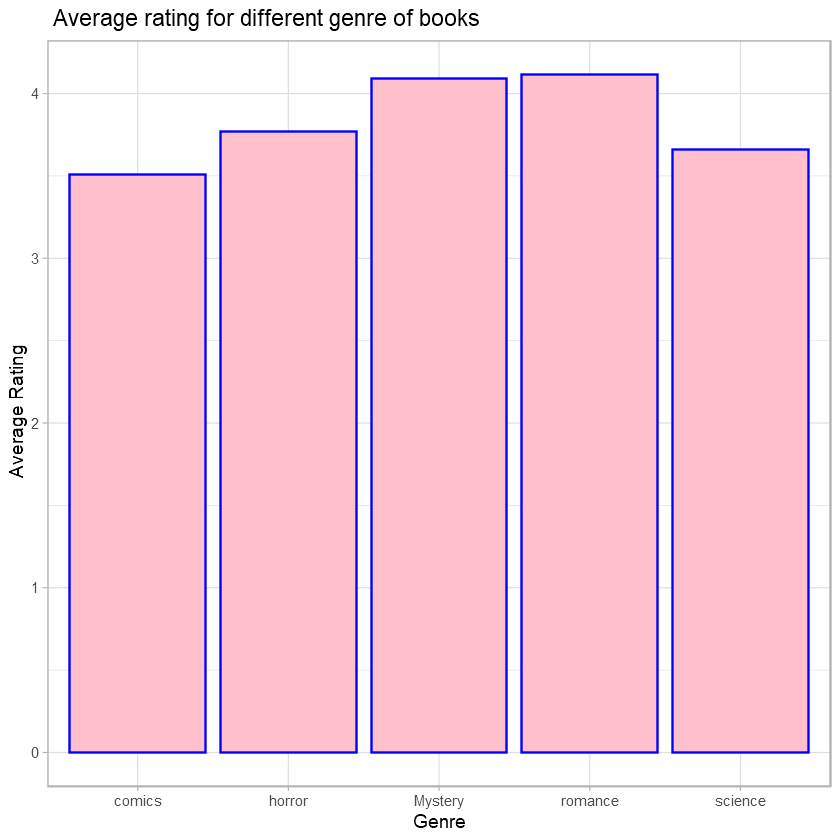

In [89]:
colnames(pl)[2]<-"Avg_Rating"
ggplot(pl, aes(Genre,Avg_Rating)) +
  geom_bar(stat="identity", colour = "blue", fill = "pink") +
  labs(x = "Genre" , y = "Average Rating", title = " Average rating for different genre of books") +
    theme_light()
 
 

In [69]:
dt<-full_df %>% group_by(ReleaseDate,Genre) %>% summarise(count = n()) # Grouping genre by release date and extracting year to find out which genre released in which year and their count
year(dt$ReleaseDate)->dt$ReleaseDate
dt

ReleaseDate,Genre,count
<dbl>,<chr>,<int>
2011,Mystery,1
2011,horror,1
2012,Mystery,1
2014,horror,1
2015,Mystery,1
2016,horror,1
2016,romance,1
2017,horror,1
2017,Mystery,1


### <span style="color:blue">  Plotting Count of different genre of books yearwise</span>

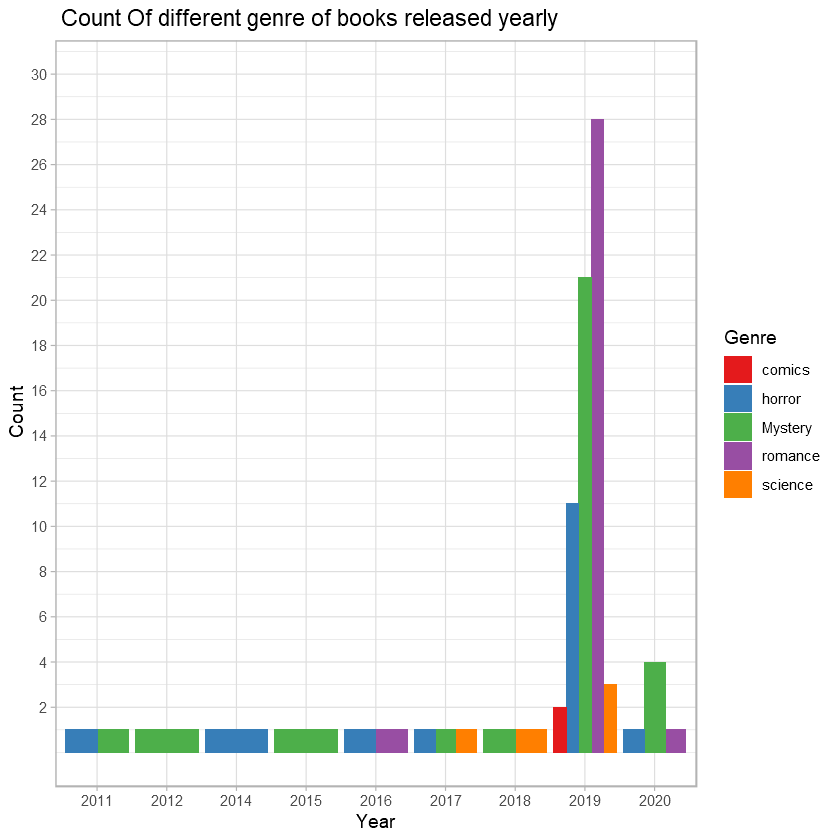

In [87]:
dt1 <- dt %>%group_by(ReleaseDate,Genre)%>%summarise(sum(count))
colnames(dt1)[3]<-"Count"
as.character(dt1$ReleaseDate)->dt1$Year 
ggplot(dt1, aes(Year,Count, fill =Genre)) + 
  geom_bar(stat="identity", position = "dodge")+     
  scale_fill_brewer(palette = "Set1") +  
  scale_y_continuous(name="Count", breaks = seq(2,30,by=2),limits=c(0,30)) +
   labs(x = "Year" , y = "Count of book release", title = " Count Of different genre of books released yearly") +
    theme_light()


#### <span style="color:blue">Working with TradeMe API . (No authentication required) </span>

In [72]:
# your answer here
#libraries
library(httr)
library(jsonlite)

trade<-GET("https://api.trademe.co.nz/v1/TravelAreas.json") ## Getting data (as a response object) from specified endpoint using httr GET request.
class(trade)
trade_content<-content(trade,"text",encoding = "UTF-8")  ## retrieving the contents of request
trade_from_json<-fromJSON(trade_content)  # converting json object to R dataframe
class(trade_from_json)
glimpse(trade_from_json) # glimpse of the data frame

[1] "response"

[1] "data.frame"

Observations: 23
Variables: 3
$ LocalityId <int> 11, 1, 4, 2, 19, 14, 5, 17, 18, 15, 7, 8, 23, 21, 10, 9,...
$ Name       <chr> "Northland", "Auckland", "Coromandel", "Bay of Plenty", ...
$ Districts  <list> [<data.frame[22 x 2]>, <data.frame[17 x 2]>, <data.fram...


In [73]:
unpacked_df<-unnest(trade_from_json,Districts)   # Unpacking the list of dataframes in "Districts" column using unnest()
glimpse(unpacked_df)

Observations: 228
Variables: 4
$ LocalityId <int> 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, ...
$ Name       <chr> "Northland", "Northland", "Northland", "Northland", "Nor...
$ DistrictId <int> 198, 194, 83, 140, 42, 142, 195, 41, 59, 181, 197, 141, ...
$ Name1      <chr> "Ahipara", "Bream Bay", "Dargaville", "Doubtless Bay", "...


#### <span style="color:blue"> Plotting no.of districts per locality </span>

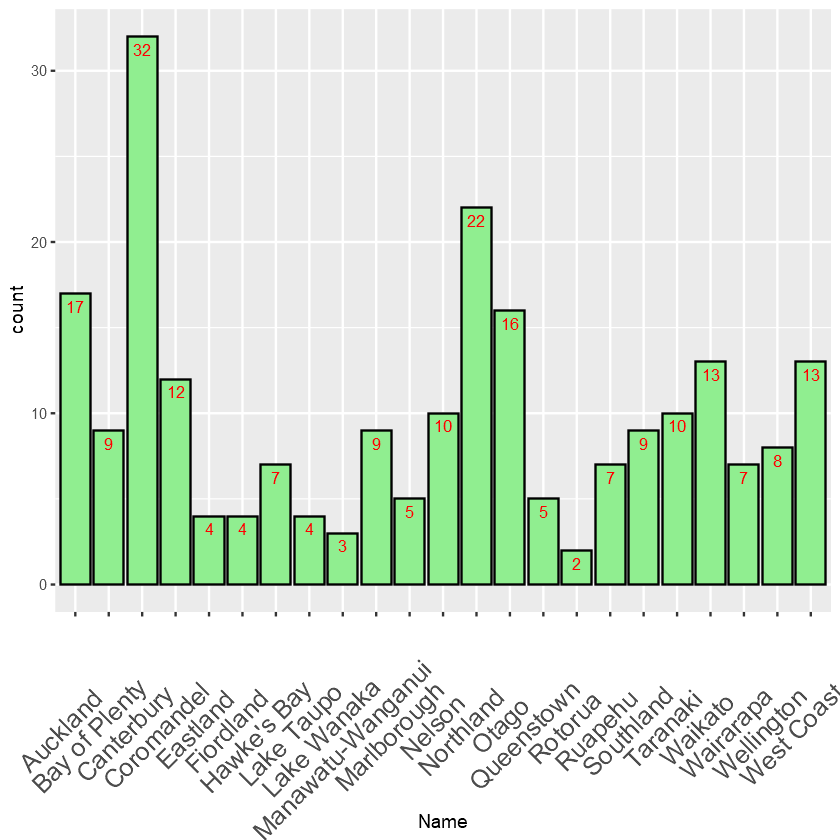

In [85]:
plt<-unpacked_df%>%group_by(Name)%>%summarise(count=n())
ggplot(plt, aes(Name,count)) +
  geom_bar(stat="identity", fill="lightgreen", color = "black")+  geom_text(aes(label=count), vjust=1.6, color="red", size=3.5)+
  theme(axis.text.x = element_text(angle=45,size=15,vjust=0.5,hjust = 0.7)) 

### Thank You!!!!!!!!